# Welcome to Zomata Bangalore EDA notebook

You can download the dataset used in this notebook from here : https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants


The objective of this notebook is to for CRISP-DM Process while providing data solution.


The CRISP-DM Process (Cross Industry Process for Data Mining) can be summarised as:

1. Business Understanding
2. Data Understanding
3. Prepare Data                   
4. Data Modeling
5. Evaluate the Results
6. Deploy

We will follow below steps to do that:

1. Pick a dataset.
2. Pose at least three questions related to business or real-world applications of how the data could be used.
3. Create a Jupyter Notebook, using any associated packages you'd like, to:
    Prepare data:

    Gather necessary data to answer your questions
    Handle categorical and missing data
    Provide insight into the methods you chose and why you chose them
    Analyze, Model, and Visualize

4. Communicate your business insights:


In [1]:
# Reading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

%matplotlib inline

import os
print(os.listdir("."))

['Zomato Bangalore EDA.ipynb', 'zomato.csv']


## 1) Pick a dataset.

In [3]:
# Reading the dataset
df = pd.read_csv('zomato.csv')

In [5]:
# look at the dataset

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## 2. Pose at least three questions related to business or real-world applications of how the data could be used.

## business questions:

### 1. Which locations to look for while opening new restaurants?
### 2. What factors affect the rating of your restaurants?
### 3. Pricing and dishes to go with?
### 4. Is an online presence really helpful?

###  Column Description:
    
* url : zomato url for the restaurants 
* address : complete location of the restaurant
* name : name of the restaurant
* online_order : whether restaurant accepts online order
* book_table : whether restaurant provides option for booking table
* rate : restaurants rating on zomato website 
* votes : number of individual who voted for restaurants
* phone : contact details of the restaurant
* localtion : area where restaurant is situated
* rest_type : Type of restaurants (Categorical value)
* dish_liked : what are all dishes of the restaurant that people liked 
* cuisines : cuisines offered by the restaurant
* approx_cost(for two people) : average cost for two people 
* review_list : reviews of the restaurant on zomato website
* menu_item : menu items available in the restuarant
* listed_in(type) : type of the restaurant
* listed_in(city) : locality of the restaurant position
    

In [7]:
print('Data has {} columns and {} rows'.format(df.shape[0],df.shape[1]))

Data has 51717 columns and 17 rows


In [8]:
# Basic information regarding dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Dropping columns 'url', 'address', 'phone' and 'menu_item' as they are not much relevant for analysis or empty.


In [9]:
df.drop(['url', 'address', 'phone', 'menu_item'], axis=1, inplace=True)

In [10]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [18]:
def plot_location_graph(data, title):
    '''
    Function to plot barplot between locations and restaurants
    based on provided filtered data

    Input : 
     - data : frequency data for locations
     - title : Title for plot 
    '''
    loc_count = data
    plt.figure(figsize=(20,10))
    sns.barplot(x=loc_count.index, y=loc_count.values, alpha=0.8, color='skyblue')
    plt.title(title, fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Locations', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.tight_layout()
    plt.show()
    

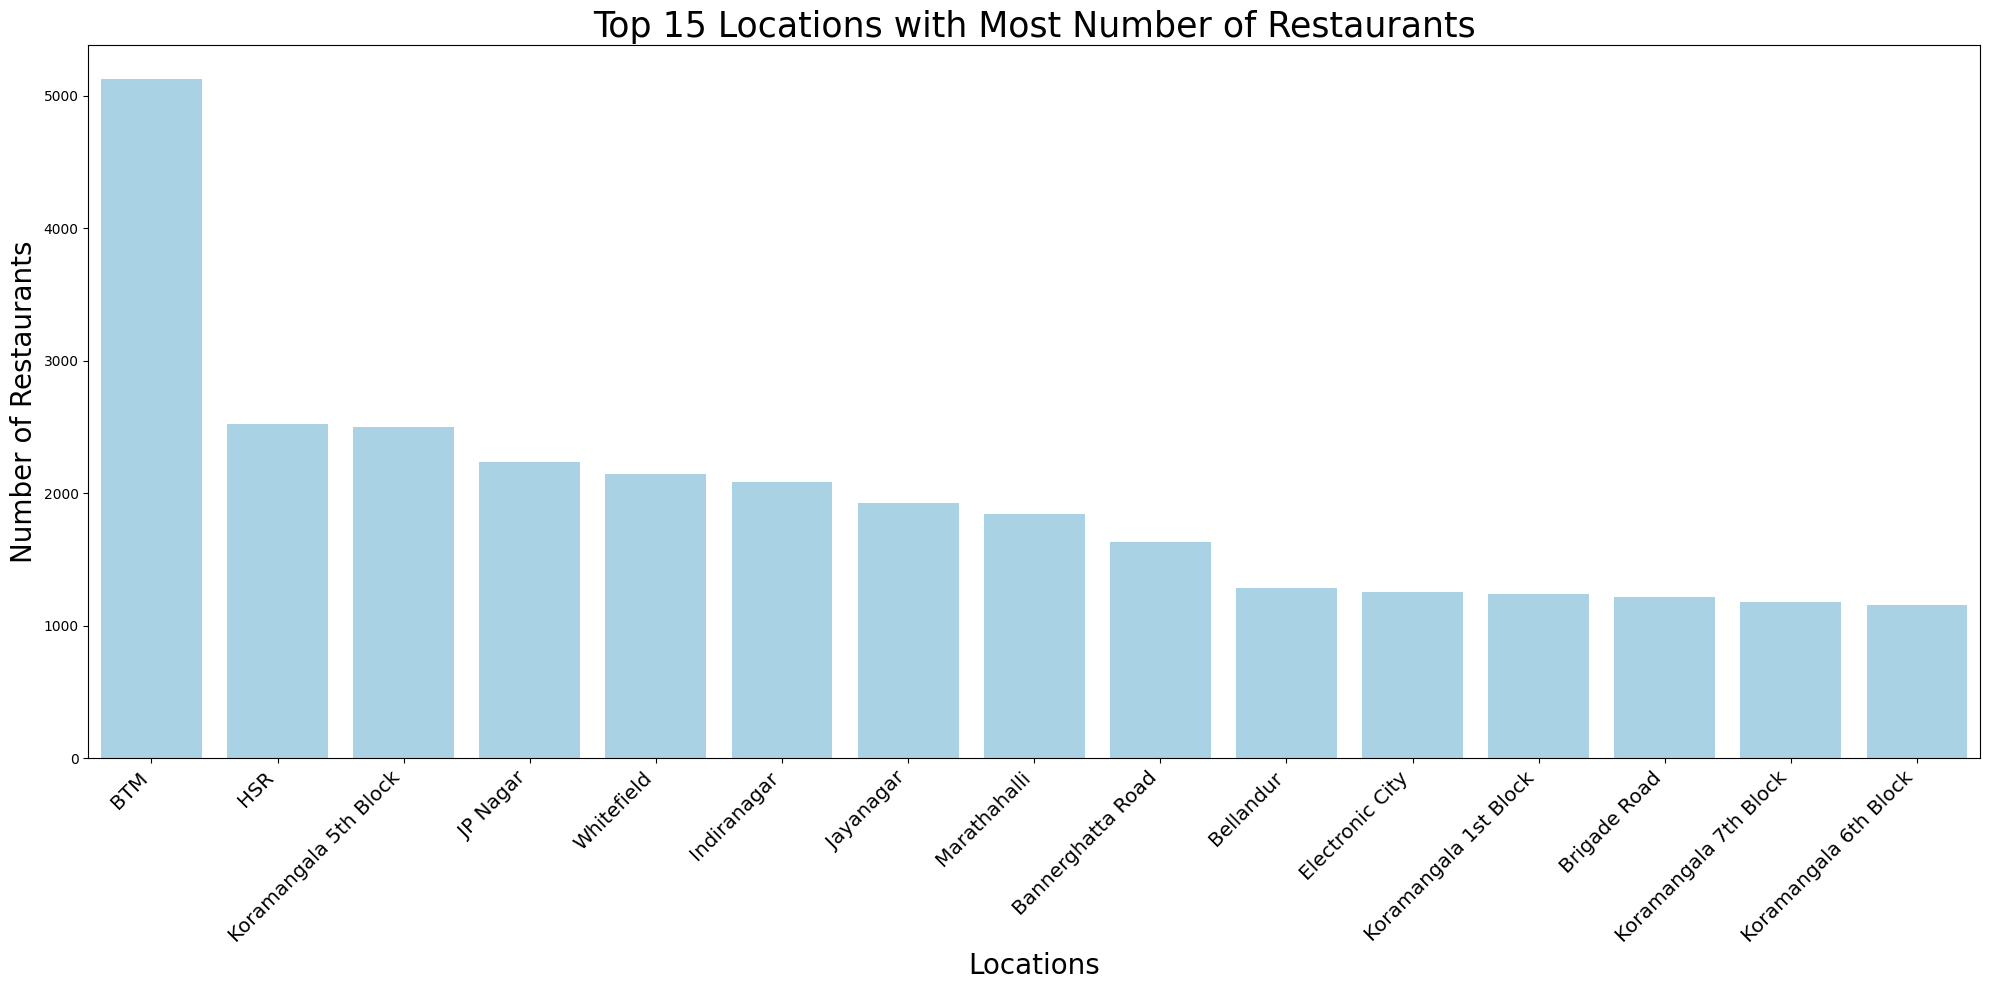

In [19]:
# Filtering top 15 locations with maximum number of restaurants in it

plot_location_graph(df['location'].value_counts()[:15], 'Top 15 Locations with Most Number of Restaurants')


We can see from above barplot that BTM, HSR and Koramangala are top locations with maximum number of restaurants. We can infer below points.

1. The competition amomg these locations can be tough to break
2. Most of the foodie are in this area or prefer to go to these locations.

Let's refine the data further for better insights.

In [20]:
print('There are total {} unique Restaurants in Bangalore'.format(len(df['name'].unique())))

There are total 8792 unique Restaurants in Bangalore


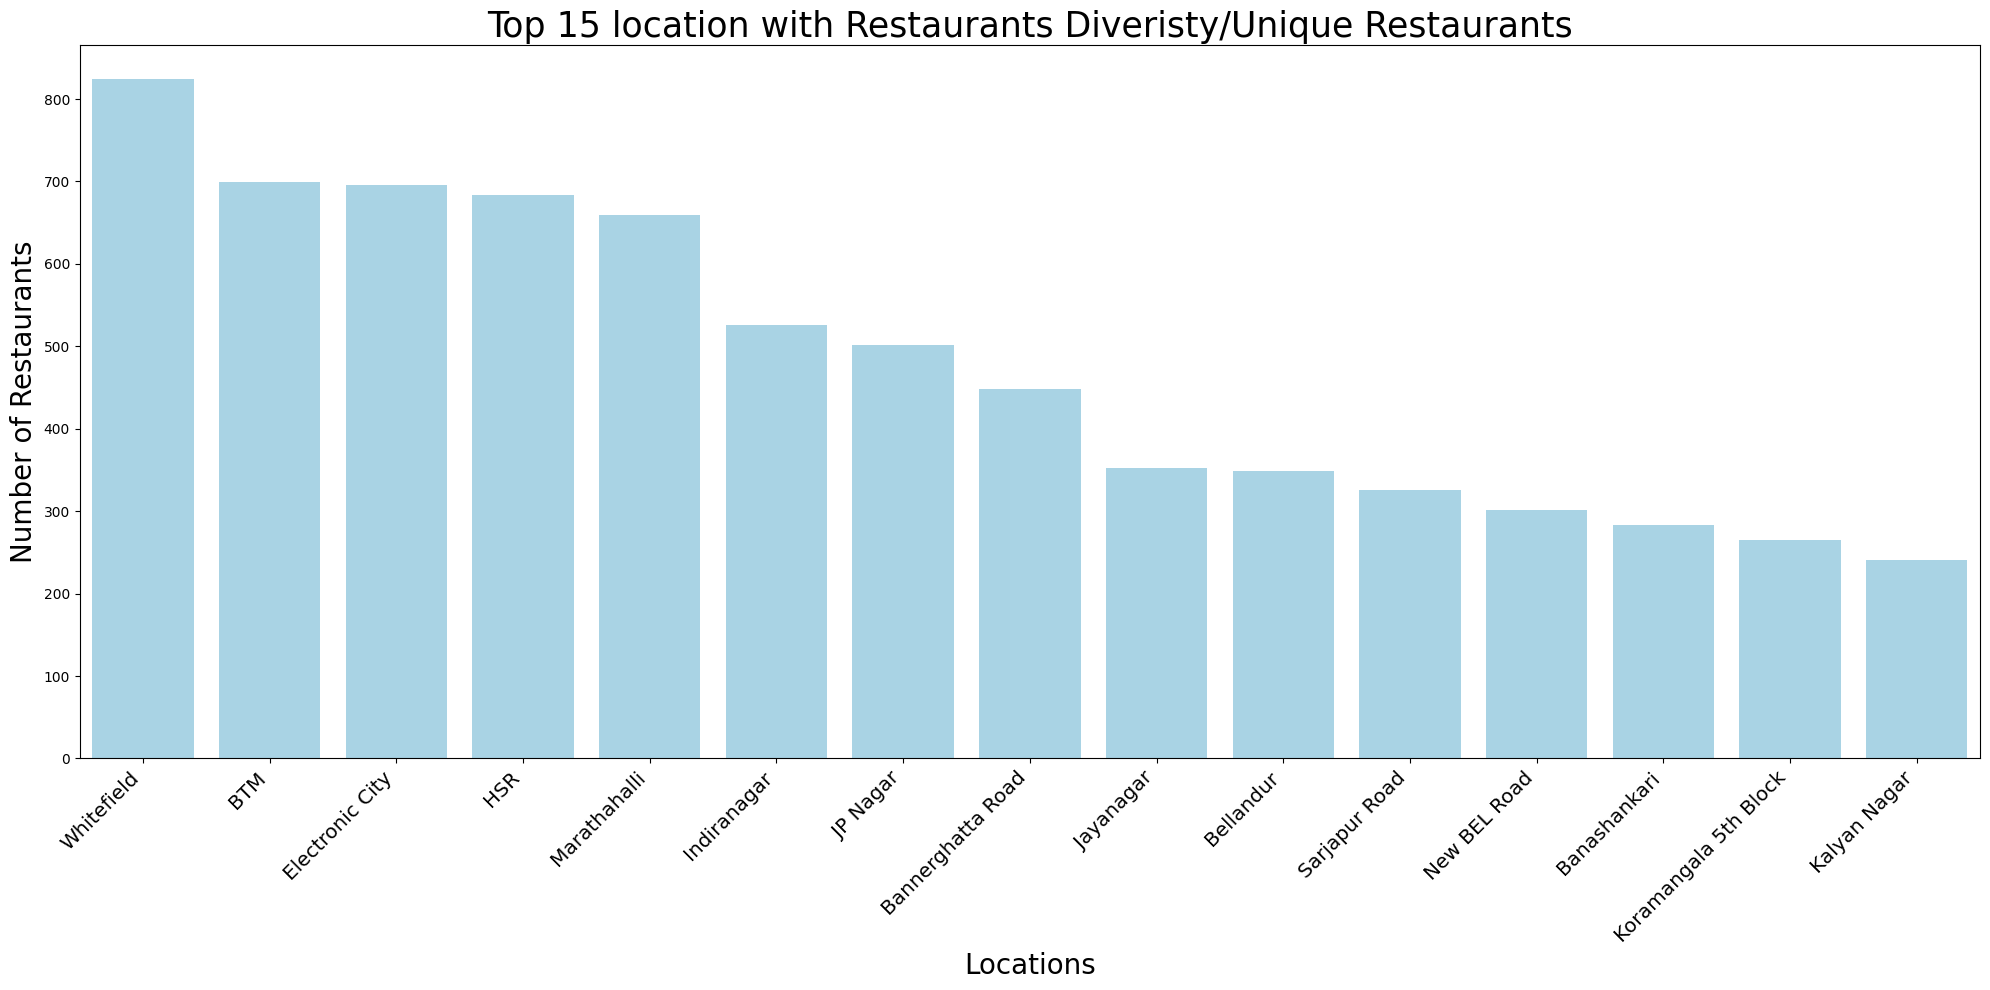

In [21]:
# Filtering locations with most number of unique restaurants

plot_location_graph(df.groupby('location')['name'].nunique().sort_values(ascending=False)[:15,], 'Top 15 location with Restaurants Diveristy/Unique Restaurants')

If you are trying to open a new foodchain then locations with most number of unique restaurants can be helpful. It looks like people prefer to open new restaurants in these locations before moving to locations like Kormangala.

Whitefield tops the chart and it maked sense also. It's a newly established locality filled with working professionals. As it's little bit far away from central bangalore, you might not need to pay hefty amount to start a business.

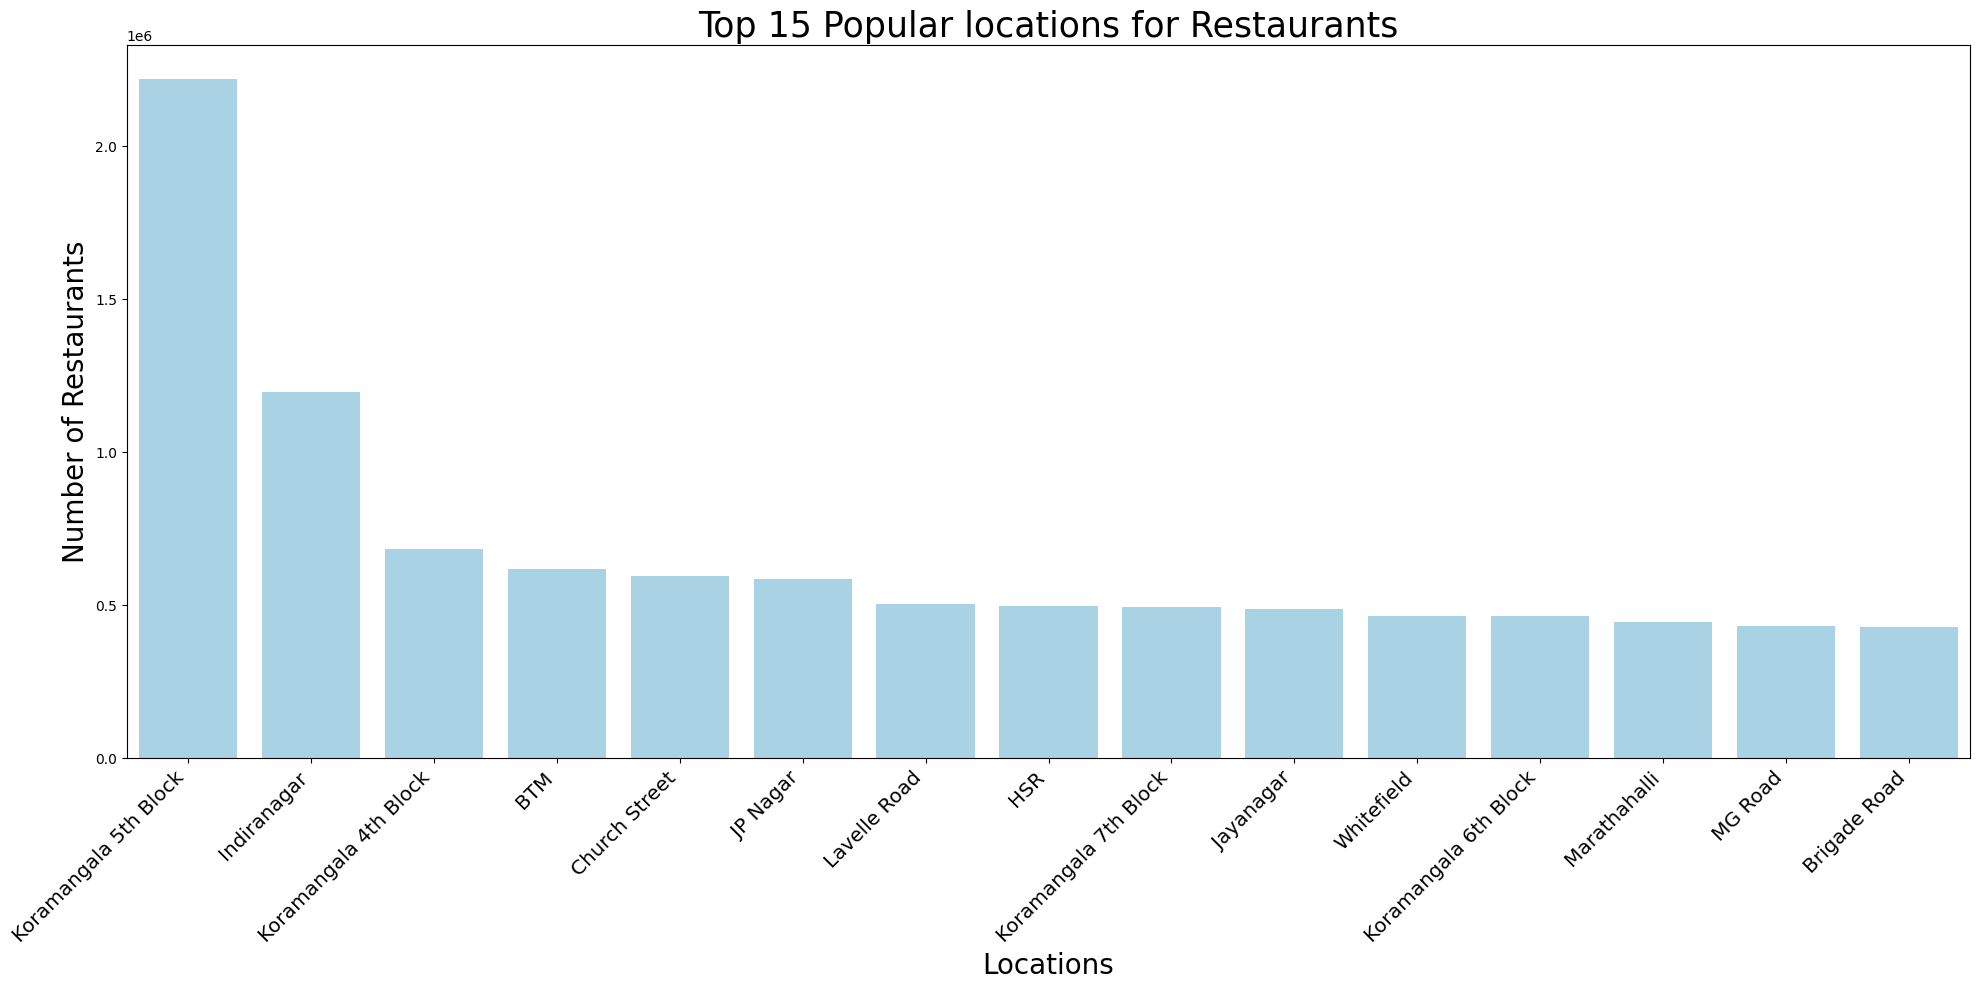

In [22]:
# Filtering locations based on number of votes given by customers

plot_location_graph(df.groupby('location')['votes'].sum().sort_values(ascending=False)[:15,], 'Top 15 Popular locations for Restaurants')

If initial investment is not much of a concern for you and you are looking to increase your chances to maximum, then why don't go with one of the best locations loved by zomato customers.

From the barchart, we can clearly see Koramangala dominates this scenario. Koramangala is the heart of Bangalore and attracts nearly all foodies. It might take heavy initial investment based upon it's popularity but it seems like a sure shot if you deliver well.

## 3. Prepare data:

###    Gather necessary data to answer your questions
###    Handle categorical and missing data
###    Provide insight into the methods you chose and why you chose them
###    Analyze and Visualize

In [23]:
def clean_data(df):
    
    df = df[df['rate'] != 'NEW']
    df = df[df['rate'] != '-']
    df_rate = df.dropna(subset=['location', 'rate', 'rest_type', 'cuisines', 'approx_cost(for two people)'])
    
    # dropping dish_liked column
    df_rate = df_rate.dropna(axis=1)
    
    binary_encode_dict = { 'Yes' : 0, 'No' : 1}
    df_rate.replace({'online_order' : binary_encode_dict, 'book_table' : binary_encode_dict}, inplace=True)
    
    df_rate['rate'] = df_rate['rate'].apply(lambda x: float(x[:-2].strip()))
    
    df_rate = pd.get_dummies(df_rate, columns=['listed_in(type)'], prefix = 'Listed')
    df_rate = pd.get_dummies(df_rate, columns=['listed_in(city)'], prefix = 'City')
    
    df_rate['approx_cost(for two people)'] = df_rate['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
    
    for i,row in df_rate.iterrows():
        rest_types = [x.strip() for x in row['rest_type'].split(',')]
        for rest_type in rest_types:
            df_rate.loc[i,rest_type] = int(1)
    
    df_rate.fillna(0, inplace=True)
    df_rate.drop(['name', 'location', 'rest_type', 'cuisines', 'reviews_list'],axis=1, inplace=True)
    
    return df_rate
    
    

In [24]:
df_rate = clean_data(df)

C:\Users\mangesh.patle\AppData\Local\Temp\ipykernel_7764\2851083515.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rate.replace({'online_order' : binary_encode_dict, 'book_table' : binary_encode_dict}, inplace=True)


C:\Users\mangesh.patle\AppData\Local\Temp\ipykernel_7764\3304281792.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rate['rate'])


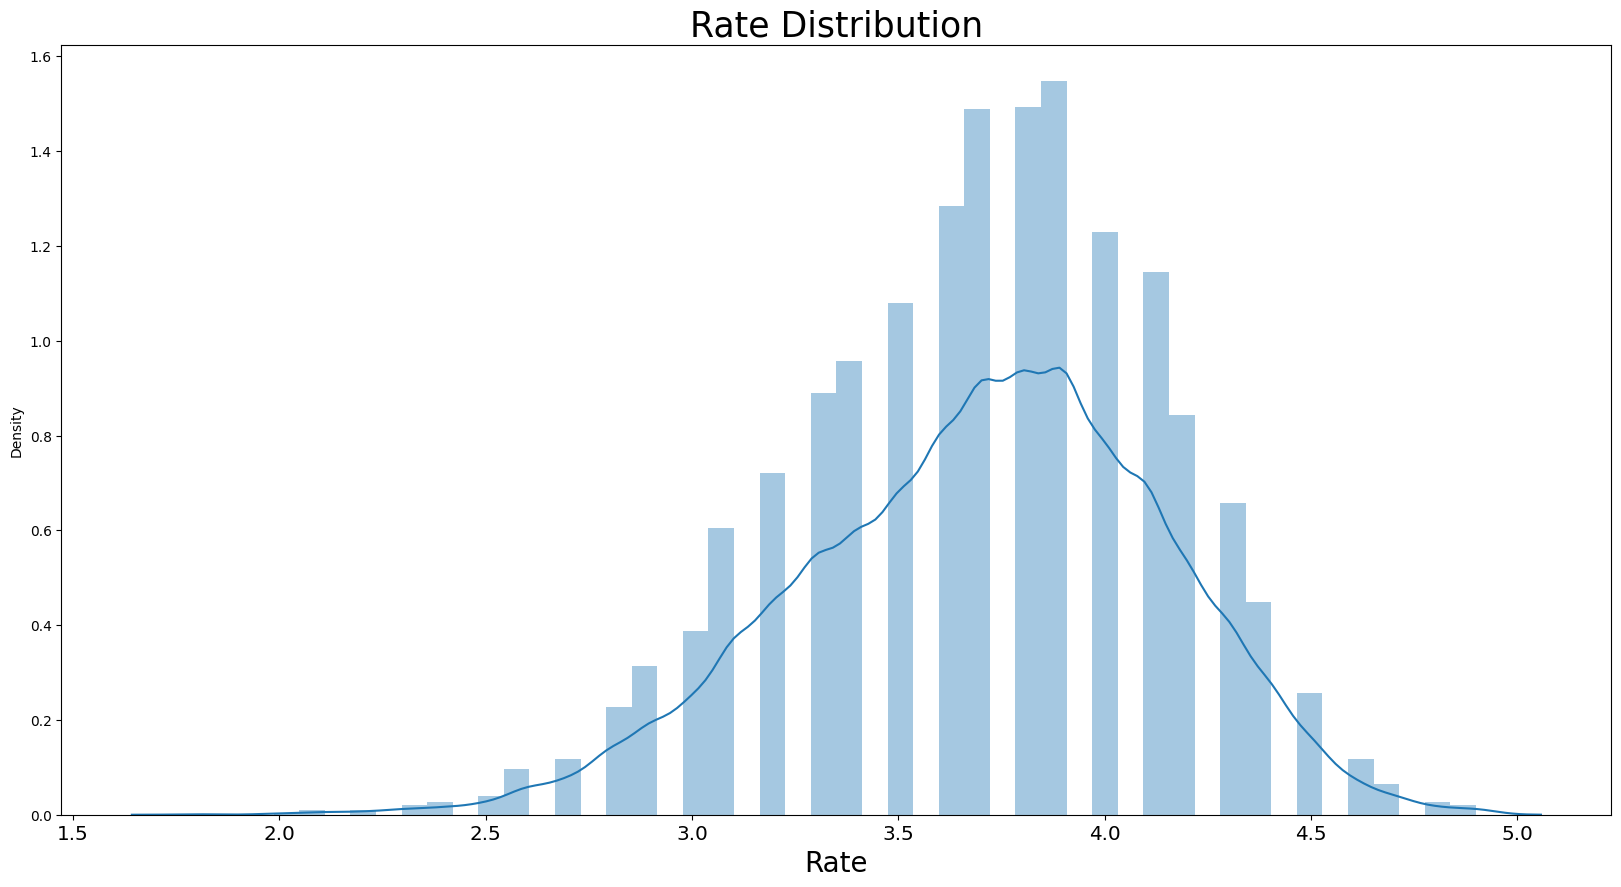

In [25]:
plt.figure(figsize=(20,10))
sns.distplot(df_rate['rate'])
plt.title('Rate Distribution', fontsize=25)
plt.xlabel('Rate', fontsize=20)
plt.xticks(

        fontweight='light',
        fontsize='x-large'  
    )
plt.show()

In [26]:
print('First Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 0.25)))
print('Second Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 0.50)))
print('Third Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 0.75)))
print('Forth Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 1)))
print('Average Rating is {} '.format(df_rate['rate'].mean()))

First Quantile of rate distribution is 3.4 
Second Quantile of rate distribution is 3.7 
Third Quantile of rate distribution is 4.0 
Forth Quantile of rate distribution is 4.9 
Average Rating is 3.702011487288854 


50% of the rate distribution lies between 3.4 and 4.0 with an average rating of 3.7. Rating of a restaurant play major role in success. Nearly everyone checks out the rating before even planing to go out and I bet you also do the same :p . To run a successful restaurant business above avaerage zomato rating is a must. 

In [27]:
corr = df_rate.corr()
corr_clean = corr[['rate']]

C:\Users\mangesh.patle\AppData\Local\Temp\ipykernel_7764\1964260086.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corr_clean)


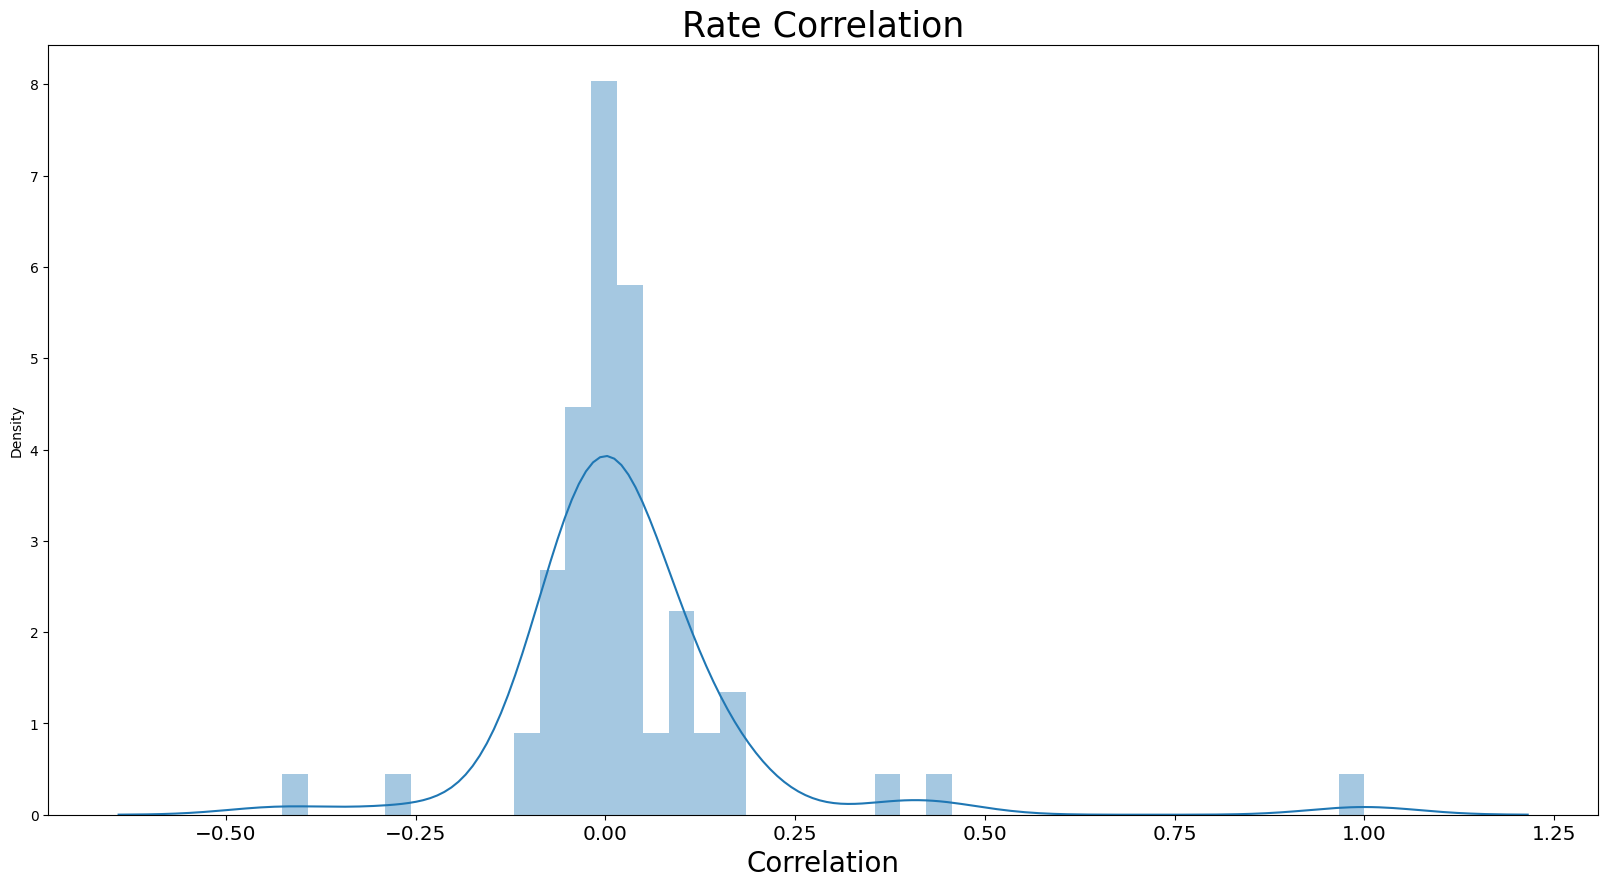

In [28]:
plt.figure(figsize=(20,10))
sns.distplot(corr_clean)
plt.title('Rate Correlation', fontsize=25)
plt.xlabel('Correlation', fontsize=20)
plt.xticks(

        fontweight='light',
        fontsize='x-large'  
    )
plt.show()

In [29]:
corr_clean[corr_clean['rate']>0.3]

,rate
rate,1.000000
votes,0.435256
approx_cost(for two people),0.385384


Here we can see that there is not much correlation between rate of restuarants and others features.
Taking features with correlation value greater than 0.3 i.e votes, approx_cost(for two people), for further analysis.

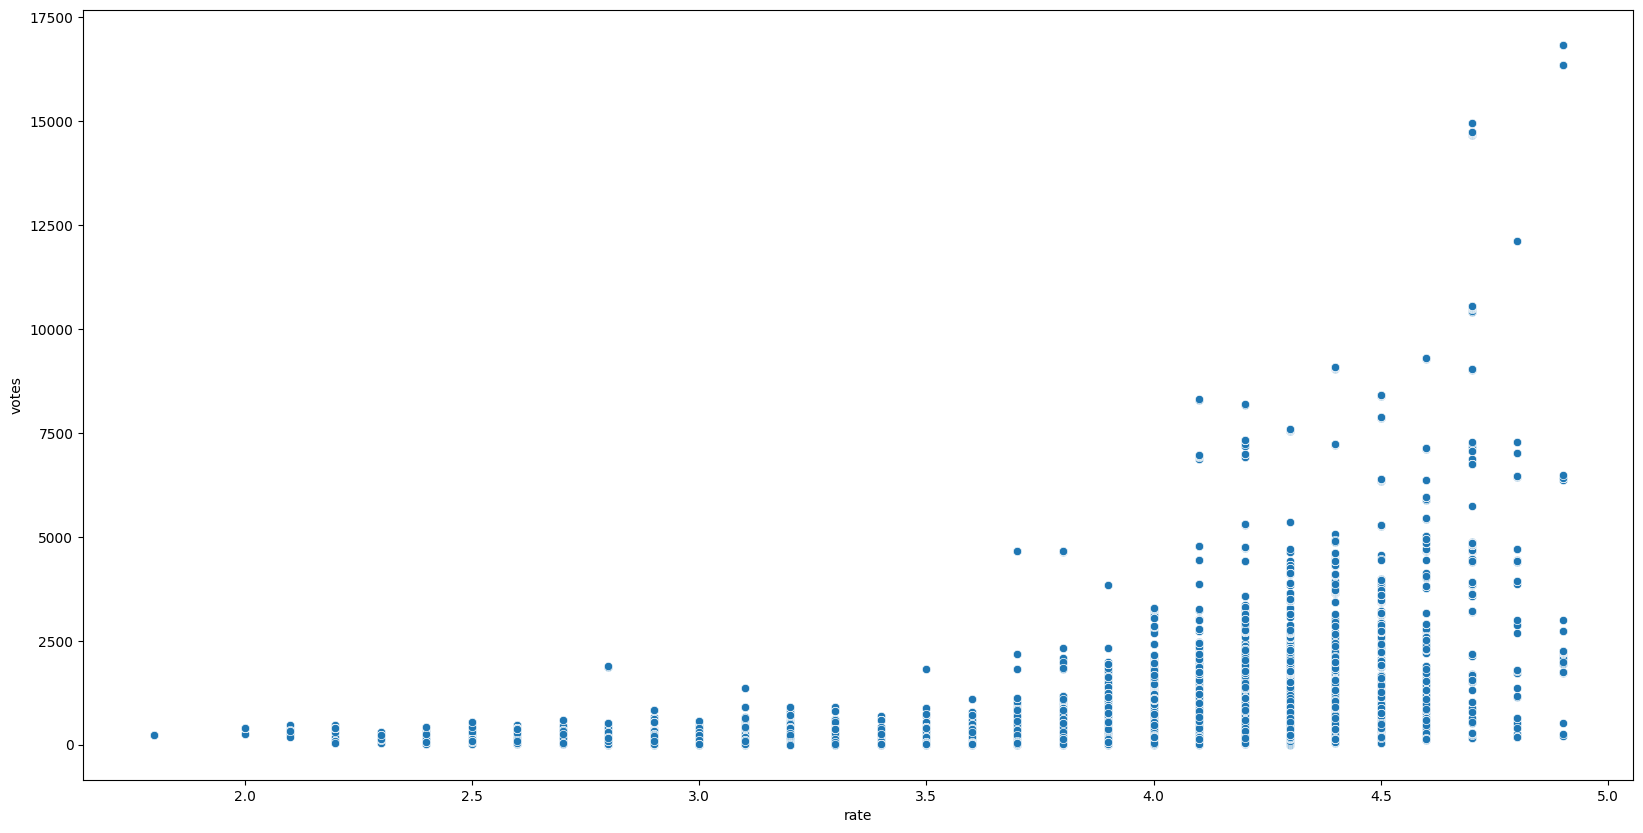

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='rate',y='votes',data=df_rate)
plt.show()

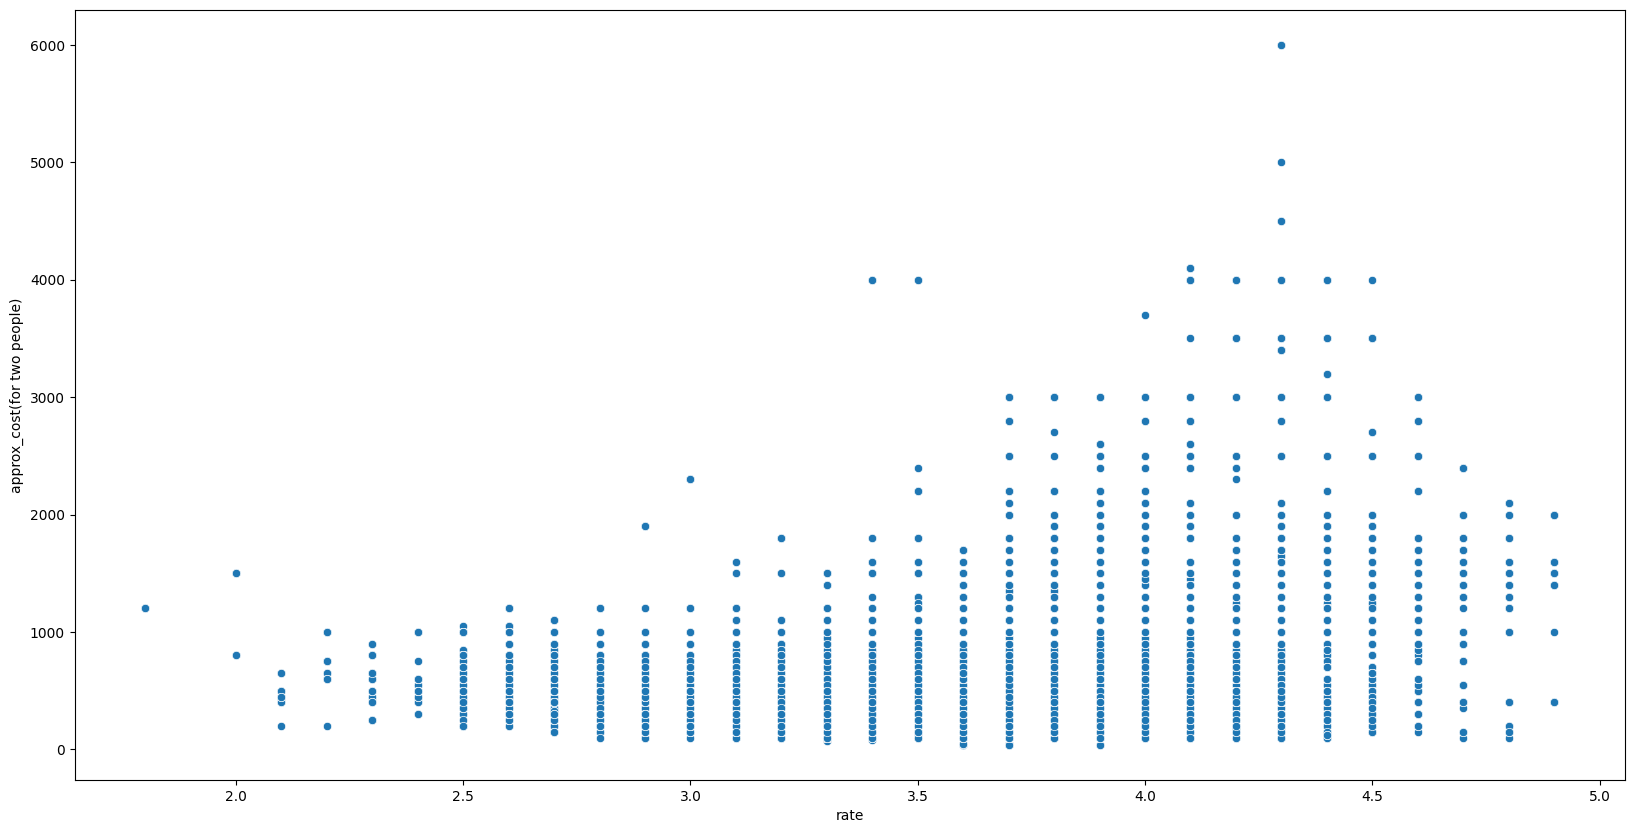

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='rate',y='approx_cost(for two people)',data=df_rate)
plt.show()

Above chart justifies that greater are the number of votes, greater will be the chances of you getting a good rating on Zomato.
The same can not be true for cost of restaurants, we can clearly see that the few restaurants only cross the mark of 2K for two people and it's also seems like a fair price for two people. The majority of restaurants serve two people for approximately 1K and for starting a new restaurant 1K is surely a best shot while keeping good profit margins.

In [32]:
def dish_liked_counter(df):
    
    dish_liked_dict = {}
    dishes = df['dish_liked'].dropna()

    for dish in dishes:
        dish_list = [x.strip() for x in dish.split(',')]
        for dish_item in dish_list:
            if dish_item in dish_liked_dict.keys():
                dish_liked_dict[dish_item] +=1
            else:
                dish_liked_dict[dish_item] = 1
    return dish_liked_dict


In [35]:
def plot_top_dishes(dish_liked_dict):
    sorted_dish = sorted(dish_liked_dict.items(), key=operator.itemgetter(1), reverse=True)
    x = [x[0] for x in sorted_dish[:20]]
    y = [y[1] for y in sorted_dish[:20]]
    
    plt.figure(figsize=(20,10))
    sns.barplot(x=x, y=y, alpha=0.8, color='skyblue')
    plt.title('Top 20 Most Liked Dishes', fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Dishes', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.tight_layout()
    plt.show()

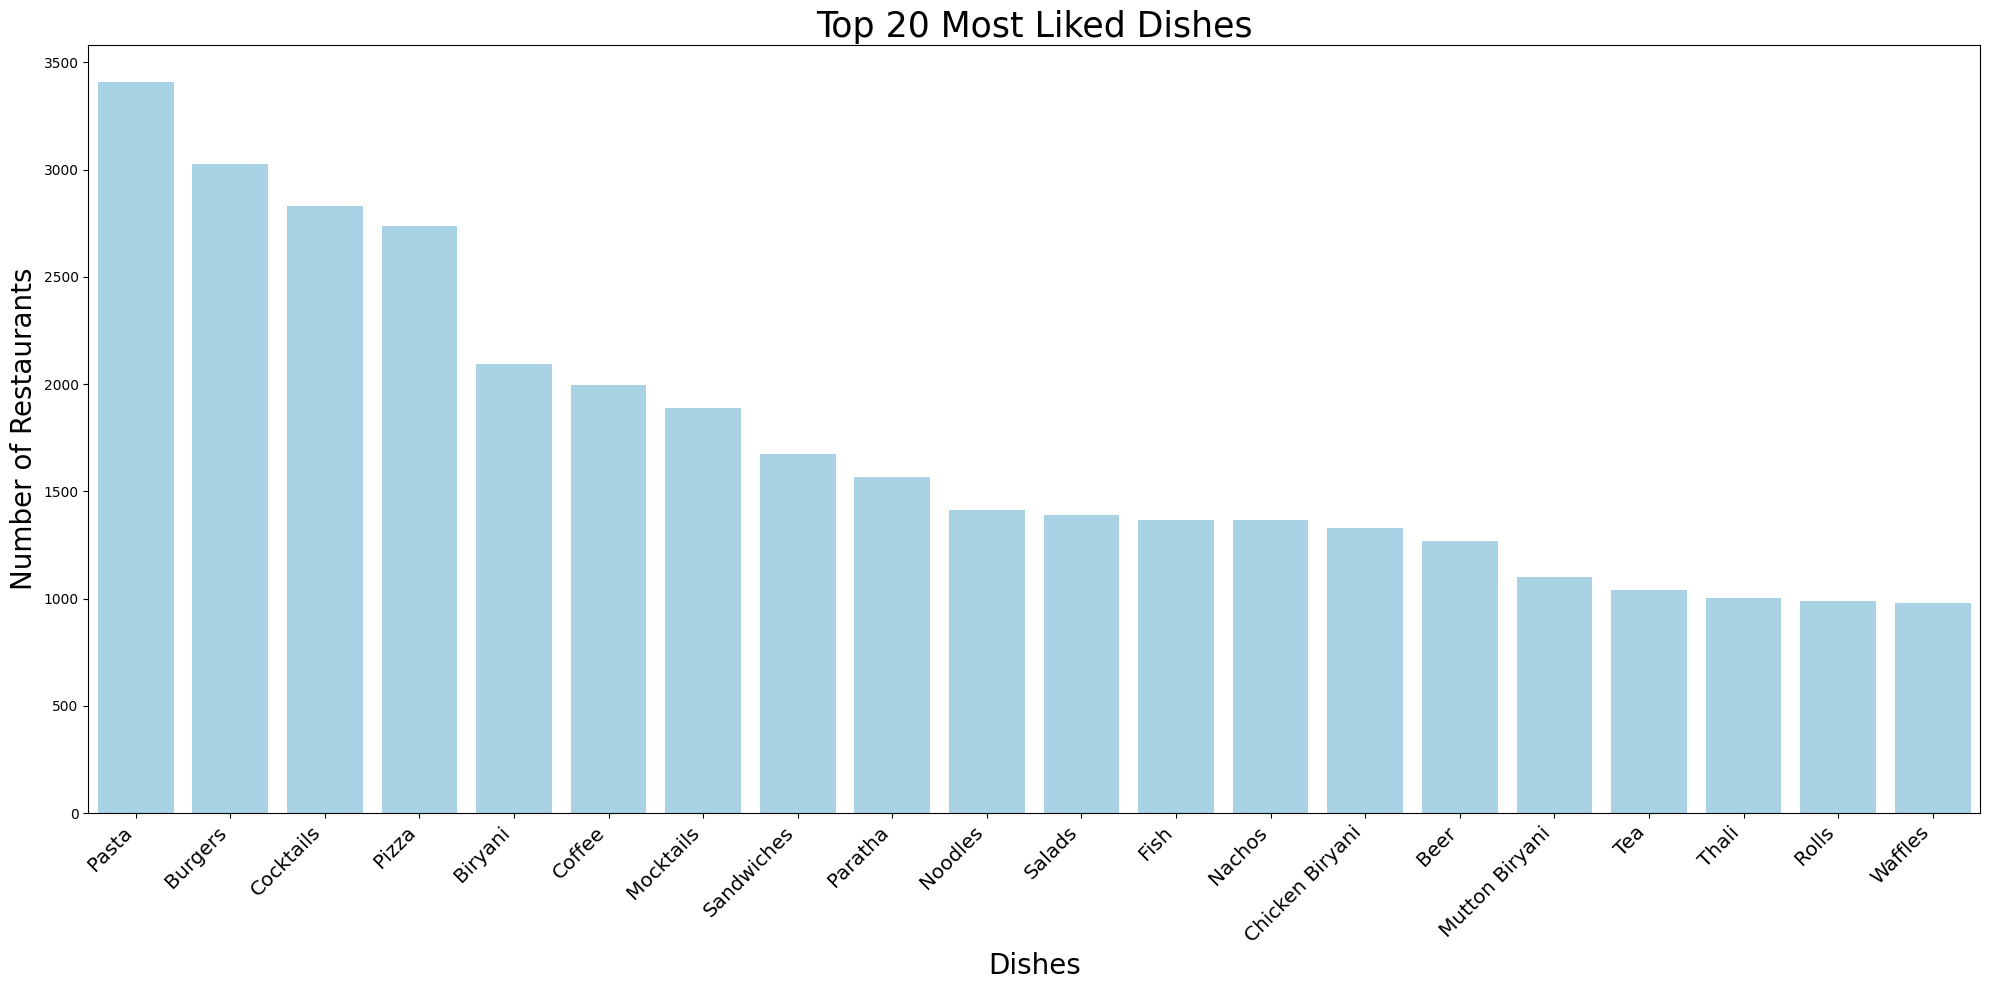

In [36]:
dish_liked_dict = dish_liked_counter(df)
plot_top_dishes(dish_liked_dict)

With such a large number of youth crowd in Bangalore, it comes with no surprise that fast foods i.e. Pasta, Burgers, Cocktails and Pizza top the chart of most liked dish.
Fast Food or a Cafe is a win here.

In [37]:
def online_order_pie(df):
    '''
    Function to plot online order pie chart
    
    Input :
     - df : 
    
    '''

    online_order = df['online_order'].value_counts()
    plt.pie(online_order.values, labels=online_order.index, autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True)
    plt.title('Is online order available ?')
    plt.axis('equal')
    plt.show()
    

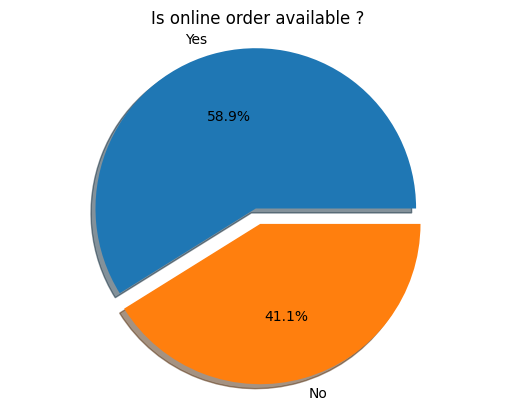

In [38]:
online_order_pie(df)

Nearly 60% of restaurants offers online ordering facility. It increases your chances of reaching broader audience in less time. Let's dig deeper.

In [39]:
def plot_distribution_overlay(df, attribute):
    '''
    Funtion to plot distribution graph of one plot on top of another
    
    Input:
     - df : Dataframe containing restuarants details
     - attribute : attribute with which online ordering needs to be tested
     
     Output:
     - Provide overlay distribution plot
    
    '''
    
    sns.distplot(df_rate[df_rate['online_order']==0][attribute].values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = 'Online')
    sns.distplot(df_rate[df_rate['online_order']==1][attribute].values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = 'Offline')
    
    plt.title('online_order vs. {} '.format(attribute), fontsize=25)
    plt.xlabel(attribute, fontsize=20)
    plt.show()
    
    
    

C:\Users\mangesh.patle\AppData\Local\Temp\ipykernel_7764\31260964.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rate[df_rate['online_order']==0][attribute].values, hist = False, kde = True,
d:\IIT\IIT Courses\BDM\Zomato-Bangalore-master\.venv\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\mangesh.patle\AppData\Local\Temp\ipykernel_7764\31260964.py:16: UserWarning: 

`distplot` is a deprecated function

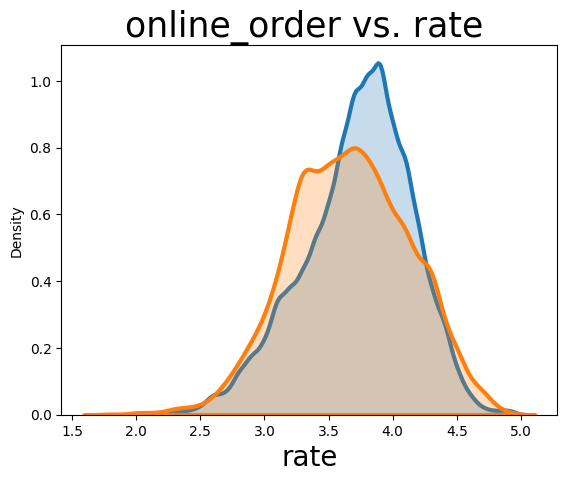

In [40]:
plot_distribution_overlay(df_rate, 'rate')

Restaurants which provide online order facility seem to have better rating than the restaurants which don't.

C:\Users\mangesh.patle\AppData\Local\Temp\ipykernel_7764\31260964.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rate[df_rate['online_order']==0][attribute].values, hist = False, kde = True,
d:\IIT\IIT Courses\BDM\Zomato-Bangalore-master\.venv\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\mangesh.patle\AppData\Local\Temp\ipykernel_7764\31260964.py:16: UserWarning: 

`distplot` is a deprecated function

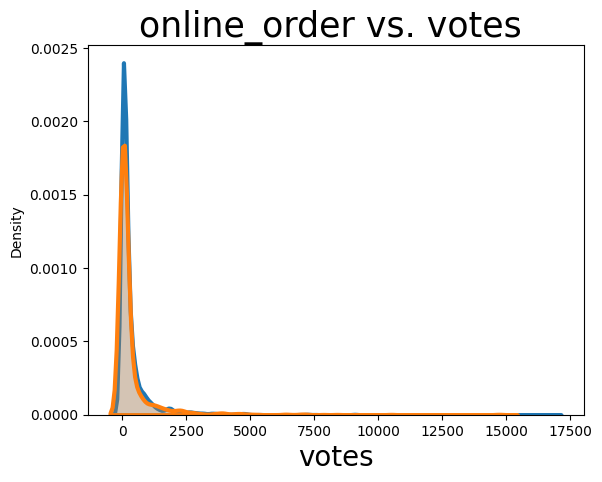

In [41]:
plot_distribution_overlay(df_rate, 'votes')

As we already found that better rating comes with more number of votes and you can increase your restaurants  votes by providing online ordering facility to reach broader audience and serve well.

## 4. Communicate your business insights:

## Conclusion

We based our analysis keeping restaurant business in mind. We tried to figure out answers to some of the common queries when opening any new restaurant.

* We figured BTM, Koramangala, HSR are good places to start restaurant. WhiteField has most number of unique restaurants and can be cheaper to get started. Koramangala, Indiranagar, BTM are most popular locations among foodies.

* Large number of votes can ensure better rating and 1K for 2 people is good to go price.

* Bangalorian love fast food.

* Providing online ordering can boast your chances.


Detailed blog post about the business findings can be find here : 